In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


# Stats

In [4]:
networks = get_networks()

In [5]:
networks

,label,old_category,source,category
1,DBLP,Coauthorship,Ley2002,social
2,HepPh,Cocitation,Leskovec2007,information
3,Enron,Communication,Klimt2004,social
4,FB-w,Social,Viswanath2009,social
5,Condm,Coauthorship,Lichtenwalter2010,social
6,HepTh,Cocitation,Leskovec2007,information
7,AMin,Coauthorship,Zhuang2013,social
8,FB-l,Social,Viswanath2009,social
9,D-rep,Communication,DeChoudhury2009,social
10,D-f,Social,Hogg2010,social


# Node temporal and static features

In [6]:
def logistic_regression_I_II(network_index: int, hypergraph: bool):
  # Start with static features
  X = {
    heuristic: np.load(
      f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy')
    for heuristic in heuristics
  }
    
  # Add temporal node features
  aggregation_strategies = [
    'm0', 'm1', 'm2', 'm3', 'q0', 'q25', 'q50', 'q75', 'q100'] # Overwrite!
  
  for time_strategy in time_strategies: # Provided in constants.py
    for nodepair_strategy in nodepair_strategies: # Provided in constants.py
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
          X[(time_strategy, nodepair_strategy, aggregation_strategy)] = np.load(
            f'data/{network_index:02}/features/time_node/'
            f'{time_strategy}_{nodepair_strategy}_{aggregation_strategy}.npy'
          )
      else:
        X[(time_strategy, nodepair_strategy)] = np.load(
          f'data/{network_index:02}/features/time_node/'
          f'{time_strategy}_{nodepair_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_I_II = {
  network_index: (
    logistic_regression_I_II(
      network_index, hypergraph=network_index in hypergraph_indices
    )
  )
  for network_index in network_indices
}
auc_I_II

{1: 0.7874408633944412,
 2: 0.8589788698309199,
 3: 0.9075607475499059,
 4: 0.7781242319980339,
 5: 0.7225750697013791,
 6: 0.8149232770297086,
 7: 0.830383167128928,
 8: 0.7885373577766271,
 9: 0.854669256747081,
 10: 0.9230260917871799,
 11: 0.9362107182725002,
 12: 0.9037197664667219,
 13: 0.872750284004544,
 14: 0.9327547831668876,
 16: 0.9403037612150448,
 18: 0.9431427492883443,
 19: 0.9378774191317888,
 20: 0.9430402650458749,
 21: 0.7267669317778352,
 22: 0.9716719642812278,
 23: 0.9588539873360684,
 24: 0.9476314864841513,
 25: 0.9394471203135897,
 28: 0.8944137520448631,
 29: 0.9236260338712248,
 30: 0.8522128421059033}

# Edge temporal features

In [7]:
def logistic_regression_III(network_index: int, hypergraph: bool):
  aggregation_strategies = [
    'm0', 'm1', 'q0', 'q25', 'q50', 'q75', 'q100'] # Overwrite of constants.py!
  
  X = dict()
  
  for heuristic in heuristics: # Provided in constants.py
    for time_strategy in time_strategies: # Provided in constants.py
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
            X[(heuristic, time_strategy, aggregation_strategy)] = np.load(
              f'data/{network_index:02}/features/time_edge/'
              f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
      else:
        X[(heuristic, time_strategy)] = np.load(
          f'data/{network_index:02}/features/time_edge/'
          f'{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_III = {
  network_index: logistic_regression_III(
    network_index, hypergraph=network_index in hypergraph_indices)
  for network_index in network_indices}
auc_III

{1: 0.8121386987134666,
 2: 0.8476441389953433,
 3: 0.8754728943310972,
 4: 0.7879093929303291,
 5: 0.7609894527558053,
 6: 0.8042567704110752,
 7: 0.8411678615354855,
 8: 0.792220715260191,
 9: 0.8415292248750175,
 10: 0.9256821027284108,
 11: 0.9330275721102884,
 12: 0.8999094585699321,
 13: 0.7991447965791864,
 14: 0.9232324308687558,
 16: 0.9258100947337362,
 18: 0.9301674913131895,
 19: 0.9245135267812282,
 20: 0.9282384427850092,
 21: 0.7187517550474565,
 22: 0.9617322595778152,
 23: 0.9540019147833404,
 24: 0.8766860788095551,
 25: 0.8908544731108365,
 28: 0.8923954590468582,
 29: 0.9171554434093293,
 30: 0.8507928721190106}

# Merge

In [38]:
x_label = 'auc (node activity + static features)'
y_label = 'auc (temporal edge features)'

df = pd.DataFrame({
  'category': networks['category'],
  x_label: pd.Series(auc_I_II),
  y_label: pd.Series(auc_III)
})
df

,category,auc (node activity + static features),auc (temporal edge features)
1,social,0.787441,0.812139
2,information,0.858979,0.847644
3,social,0.907561,0.875473
4,social,0.778124,0.787909
5,social,0.722575,0.760989
6,information,0.814923,0.804257
7,social,0.830383,0.841168
8,social,0.788537,0.792221
9,social,0.854669,0.841529
10,social,0.923026,0.925682


In [41]:
df.corr()

,auc (node activity + static features),auc (temporal edge features)
auc (node activity + static features),1.000000,0.944385
auc (temporal edge features),0.944385,1.000000


# Figure

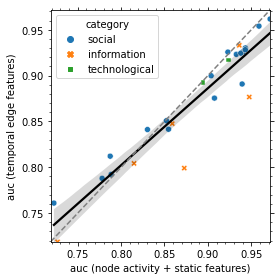

In [40]:
auc_values = df[[x_label, y_label]].values.flatten()
lim = (min(auc_values), max(auc_values))


with plt.rc_context(rc):
  sns.scatterplot(data=df, x=x_label, y=y_label, hue='category', style='category')
  sns.regplot(data=df, x=x_label, y=y_label, scatter=False, color='black')
  plt.axline((0,0), (1,1), ls='--', c='grey')
  plt.xlim(lim)
  plt.ylim(lim)
  ax = plt.gca()
  ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
  plt.tight_layout()
  plt.savefig('figures/rq3-node-vs-edge-features.pdf')